# Introduction 

####  Film industry has always been booming and movies made an estimated 42 billion in 2018. It is such a popular industry but what attributes make a movie profitable ? 

## Define : Problem Statement

###### Predict  overall worldwide box office revenue of each movie through machine learning techniques.  Using categorical attributes such as genres, and home page , as well as numerical variables such as budget run time, I will build a model that will predict the revenue of a moive  on the aforementioned features.

## Package Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')
import warnings
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plot
import json
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

__author__ = "Ian Wang"
__email__ = "wkon621@gmail.com"

## Data Loading & Overview

In [2]:
#load the training data
movie=pd.read_csv('train.csv')
movie.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
#Inpsect the training dataset
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [4]:
#Inspect the testing data
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [5]:
#trainig data has only 3000 records will testing data has 4398 records
print( movie.shape , test.shape)

(3000, 23) (4398, 22)


In [6]:
print('Missing values in training data is as below:\n', movie.isnull().sum())
print('\nMissing values in testing data is as below:\n',test.isnull().sum())

Missing values in training data is as below:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Missing values in testing data is as below:
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language        

###### We found out number of missing values within each column. Top 5 columns with most missing values are 'belongs_to_collection' , 'homepage', 'tagline', 'Keywords', 'production_companies'. 

###### Lets explore our dataset with some viz

## Discover - Exploratory Analysis

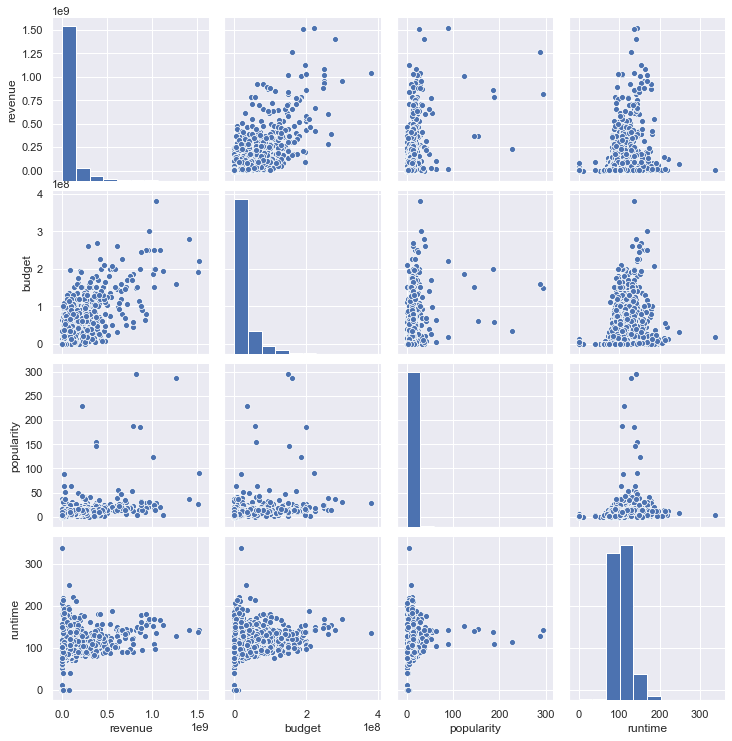

In [7]:
# Pair-wise correlation between numeric variables

corr = movie[['revenue','budget','popularity','runtime']]
sns.pairplot(corr)
plt.show()

###### At first glance, revenue and budget seems correlated 

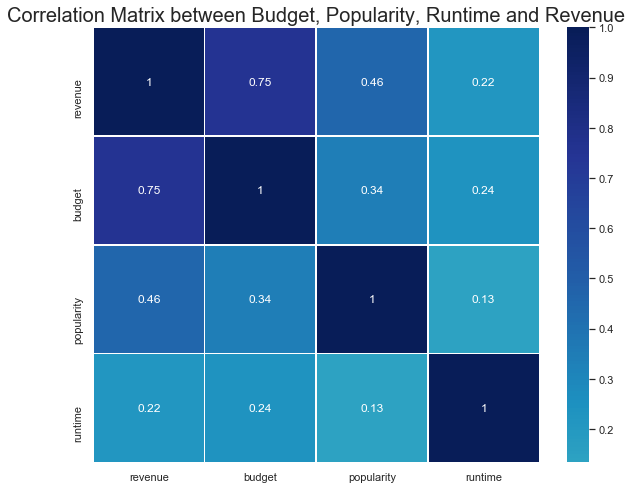

In [8]:
# Correlation Matrix 
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = movie[col].corr()

sns.heatmap(corr, xticklabels=col, yticklabels=col, linewidths=.5, center=0, cmap='YlGnBu',annot=True)
plt.title('Correlation Matrix between Budget, Popularity, Runtime and Revenue' , fontsize=20)
plt.show()

###### Based on the correlation matrix, revenue and budget has a strong positive correlation of .75

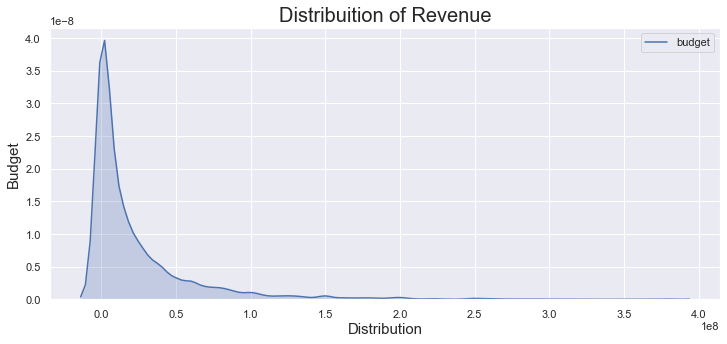

In [9]:
# Budget has a bimodal distribution 
plt.figure(figsize=(12,5))
x= movie.budget
ax2 = sns.kdeplot(x, shade = True )
plt.title('Distribuition of Revenue', fontsize=20)
ax2.set_xlabel('Distribution', fontsize=15) 
ax2.set_ylabel('Budget', fontsize=15) 
plt.show()

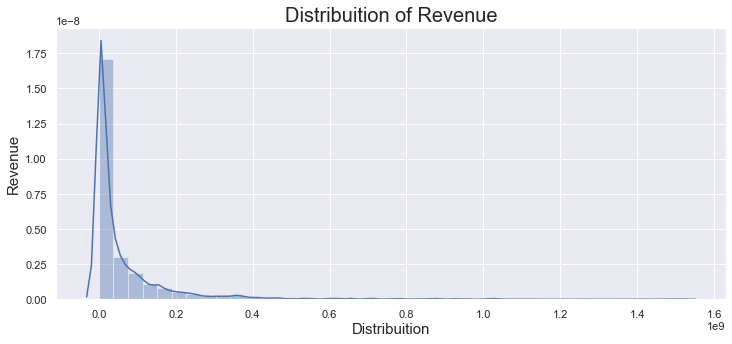

In [10]:
#Distribution of Revenue 

plt.figure(figsize=(12,5))
ax1 = sns.distplot(movie['revenue'], bins=40, kde=True)
ax1.set_xlabel('Distribuition', fontsize=15) 
ax1.set_ylabel('Revenue', fontsize=15) 
ax1.set_title("Distribuition of Revenue", fontsize=20)
plt.show() 

###### We spotted that revenue distribution heavily skewed to the left! It is better to use np.log1p of revenue.

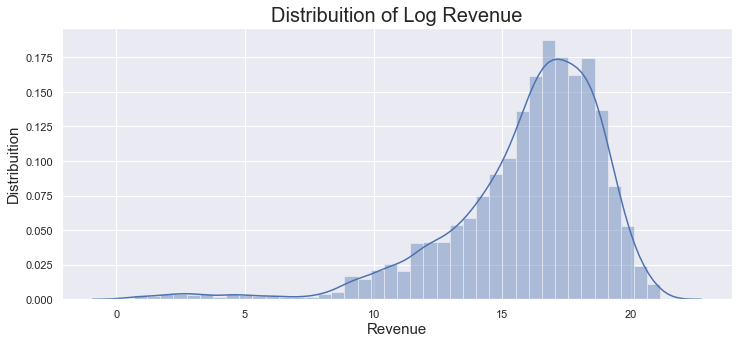

In [11]:
#Distribution of log Revenue 
plt.figure(figsize=(12,5))
a = sns.distplot(np.log1p(movie['revenue']), bins=40, kde=True)
a.set_xlabel('Revenue', fontsize=15) 
a.set_ylabel('Distribuition', fontsize=15) 
a.set_title("Distribuition of Log Revenue", fontsize=20) 
plt.show()

In [12]:
#Extract year from release_date since most rows have only last two digits of year  provided
movie[['release_month','release_day','release_year']]=movie['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

# Some rows have 4 digits of year instead of 2, applying (movie['release_year'] < 100) this condition
movie.loc[ (movie['release_year'] <= 19) & (movie['release_year'] < 100), "release_year"] += 2000
movie.loc[ (movie['release_year'] > 19)  & (movie['release_year'] < 100), "release_year"] += 1900

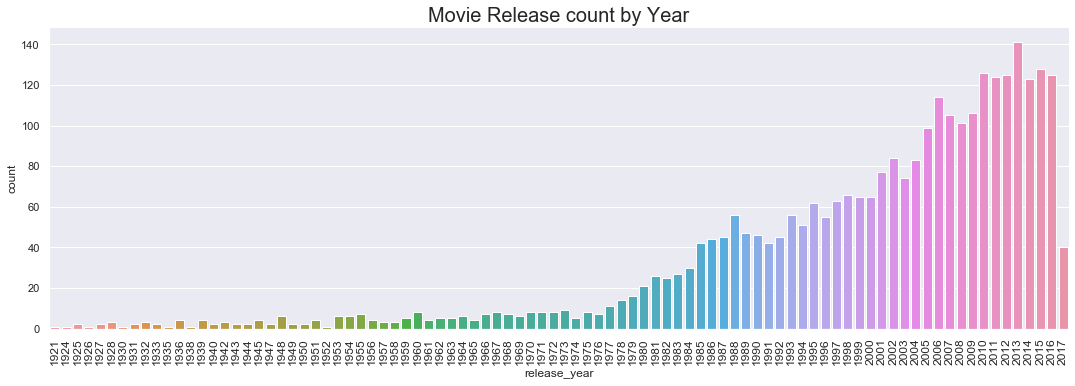

In [13]:
#Movie Release year distribution 

sns.catplot(x='release_year' , data= movie, kind='count', height = 5, aspect = 3)
plt.title("Movie Release count by Year",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.show()

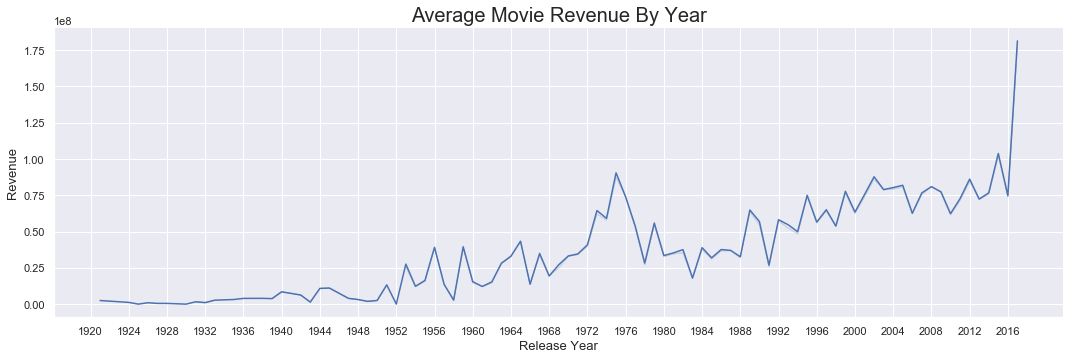

In [14]:
# Average movie revenue by year
movie['AvgRevenueByYear'] = movie.groupby("release_year")["revenue"].aggregate('mean')
sns.relplot(x='release_year', y='revenue', data=movie, kind='line', height = 5, aspect = 3, ci=False)
plt.xticks(np.arange(1920,2018,4))
plt.title("Average Movie Revenue By Year",fontsize=20)
plt.xlabel("Release Year", fontsize=13)
plt.ylabel("Revenue", fontsize=13)
plt.show()

###### It is not a surprise that average movie reveneu is positively correlated with year. One could factor in inflation, buying power to explain

## Pre-processing

### Remove Irrelevant colums

In [15]:
#first remove certain features which are irrelevant for our prediction, drop orignial langauge becasue I suppose only counts of spoke_language helps predict reveneu

movie.drop(['imdb_id','poster_path','original_title','title','original_language','release_date' ],axis=1,inplace=True)
test.drop(['imdb_id','poster_path','original_title','title','original_language','release_date'],axis=1,inplace=True)
movie['log_revenue']=np.log1p(movie['revenue'])

###  belongs_to_collection

In [16]:
# Inspect belongs_to_collection 
for r,v in enumerate(movie['belongs_to_collection'][:5]):
    print(r,v)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan
4 nan


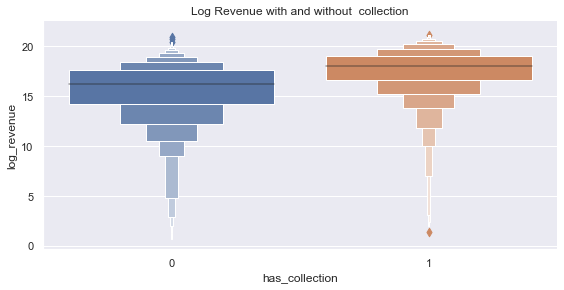

In [17]:
#Converting collections as binary

movie['has_collection'] = 0
movie.loc[movie['belongs_to_collection'].isnull() == False, 'has_collection'] = 1

test['has_collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'has_collection'] = 1

#Homepage v/s Revenue
sns.catplot(x='has_collection', y='log_revenue', data=movie,  kind='boxen', height =4, aspect = 2)
plt.title('Log Revenue with and without  collection')
plt.show()

###### There are 2396 missing values within this column. I suppose name of collection could be useful but will not incorporate in our model . New column named  'has_collection' is created as a binary feature to record whether a movie belongs to a collection or not. 

In [18]:
# Drop the original colleciton column
movie = movie.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

### homepage

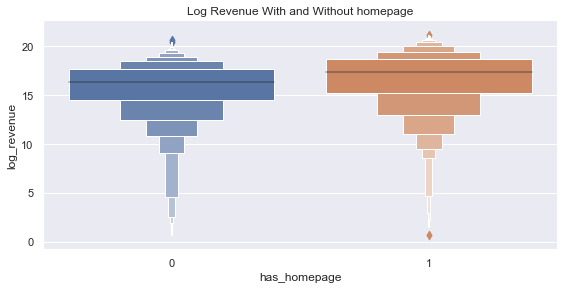

In [19]:
#Converting homepage as binary

movie['has_homepage'] = 0
movie.loc[movie['homepage'].isnull() == False, 'has_homepage'] = 1

test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

#Homepage vs Revenue
sns.catplot(x='has_homepage', y='log_revenue', data=movie, kind='boxen', height = 4, aspect = 2)
plt.title('Log Revenue With and Without homepage')
plt.show()

###### There are 2054 missing values within this column. New column named  'has_homepage' is created as a binary feature to record whether a movie belongs to a collection or not. 

In [20]:
# drop the original homepage column
movie = movie.drop(['homepage'], axis=1)
test = test.drop(['homepage'], axis=1)

###  genres 

In [21]:
#Inspect genres 
for r,v in enumerate(movie['genres'][:5]):
    print(r,v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


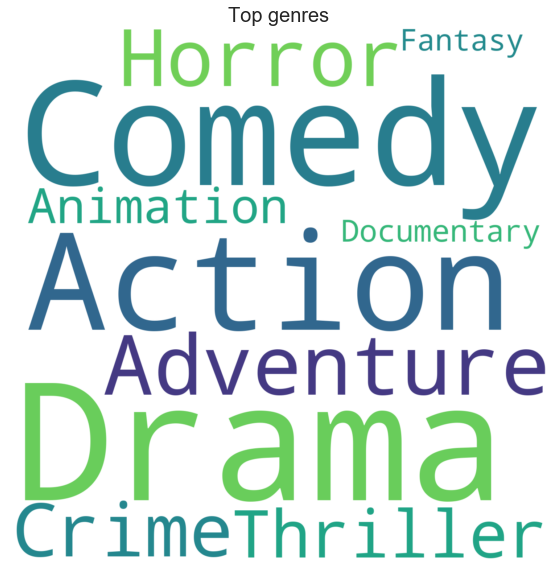

OrderedDict([('Drama', 785),
             ('Comedy', 604),
             ('Action', 520),
             ('Adventure', 187),
             ('Horror', 170),
             ('Crime', 147),
             ('Thriller', 116),
             ('Animation', 76),
             ('Documentary', 71),
             ('Fantasy', 68),
             ('Romance', 67),
             ('Science Fiction', 41),
             ('Family', 36),
             ('Mystery', 33),
             ('War', 20),
             ('Music', 20),
             ('History', 16),
             ('Western', 13),
             ('Foreign', 2),
             ('TV Movie', 1)])

In [22]:
#Count genres and output to a dict 
genres = {}
for i in movie['genres']:
    if(pd.isnull(i) ==False):
        if (eval(i)[0]['name']) in genres:
            genres[eval(i)[0]['name']]+=1
        else:
                genres[eval(i)[0]['name']]=1

plt.figure(figsize = (15, 10))

wordcloud = WordCloud(background_color="white",width=1500,height=1500, max_words=10,normalize_plurals=False).generate_from_frequencies(genres)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Top genres',fontsize = 20)
plt.axis("off")
plt.show()
ordergenres = OrderedDict(genres)

#Drama, Comedy and Thriller are popular genres with more than 500 counts
OrderedDict(sorted(ordergenres.items(), key=lambda x: x[1],  reverse=True))

In [23]:
num_genres=[]
for r in movie['genres']:
    if(pd.isnull(r) ==False):
        num_genres.append(len(eval(r)))
    else:
        num_genres.append(0)
        
movie['num_genres'] = num_genres

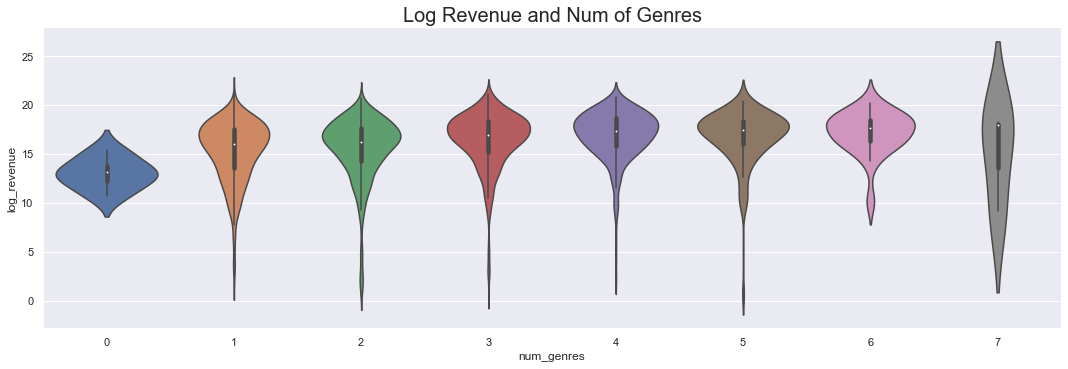

In [24]:
#Genres vs revenue

sns.catplot(x='num_genres', y='log_revenue', data=movie, kind='violin', height = 5, aspect = 3);
plt.title('Log Revenue and Num of Genres', fontsize=20)
plt.show()

In [25]:
#Adding genres count to test data
num_genres_test=[]
for r in test['genres']:
    if(pd.isnull(r) ==False):      
        num_genres_test.append(len(eval(r)))       
    else:
        num_genres_test.append(0) 
        
test['num_genres'] = num_genres_test

In [26]:
## drop the original genre column
movie.drop(['genres'],axis = 1, inplace=True)
test.drop(['genres'],axis=1, inplace = True)

### production_companies

In [27]:
for r,v in enumerate(movie['production_companies'][:5]):
    print(r,v)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [28]:
#Adding production_companies count for  movie
prod_comp=[]
for r in movie['production_companies']:
    if(pd.isnull(r) ==False):
        prod_comp.append(len(eval(r)))
    else:
        prod_comp.append(0)
        
movie['num_prod_companies'] = prod_comp

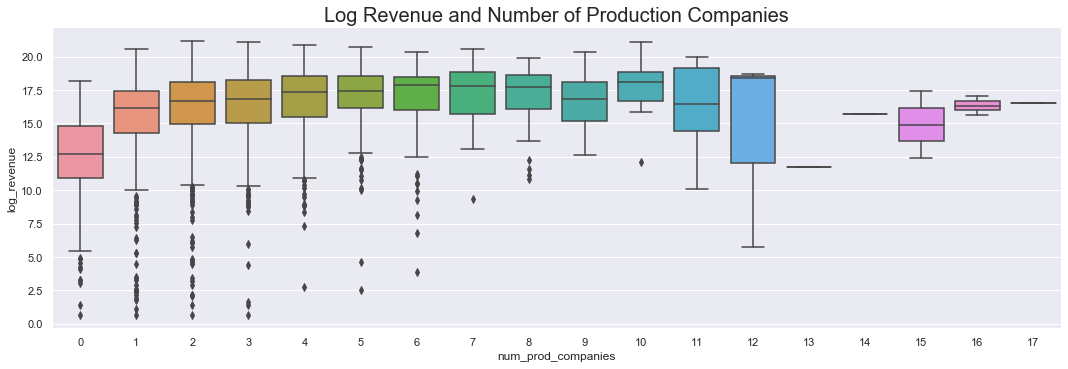

In [29]:
#number of prod companies vs revenue

sns.catplot(x='num_prod_companies', y='log_revenue', data=movie, kind='box', height = 5, aspect = 3);
plt.title('Log Revenue and Number of Production Companies', fontsize=20)
plt.show()

In [30]:
#Adding production_companies count for test data

test_prod_comp=[]
for r in test['production_companies']:
    if(pd.isnull(r) ==False):
        test_prod_comp.append(len(eval(r))) 
    else:
        test_prod_comp.append(0)
        
test['num_prod_companies'] = test_prod_comp

In [31]:
# Drop original production_companies

movie.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

### production_countries

In [32]:
for r,v in enumerate(movie['production_countries'][:5]):
    print(r,v)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [33]:
#Adding production_countries count for movie

prod_cos=[]
for r in movie['production_countries']:
    if (pd.isnull(r)==False):
        prod_cos.append(len(eval(r)))
    else:
        prod_cos.append(0)

movie['num_prod_countries'] = prod_cos

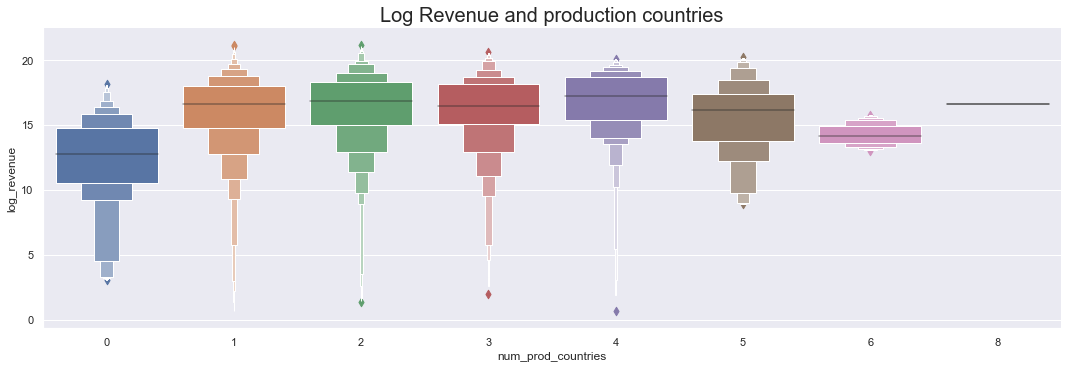

In [34]:
#number of prod countries vs revenue

sns.catplot(x='num_prod_countries', y='log_revenue', data=movie, kind='boxen', height = 5, aspect = 3);
plt.title('Log Revenue and production countries', fontsize=20)
plt.show()

In [35]:
#Adding production_countries count for  test data
test_prod_co=[]
for r in test['production_countries']:
    if(pd.isnull(r)==False):
        test_prod_co.append(len(eval(r))) 
    else:
        test_prod_co.append(0)
        
test['num_prod_countries'] = test_prod_co

In [36]:
#Drop original production_countries

movie.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

### overview

In [37]:
#inspect overview
for r,v in enumerate(movie['overview'][:5]):
    print(r,v)

0 When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.
1 Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...
2 Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.
3 Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end when ev

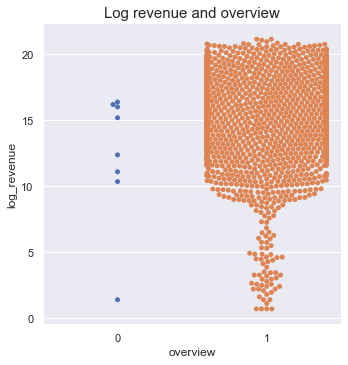

In [38]:
#Transform overview to binary, 1 means overview present

movie['overview']=movie['overview'].map(lambda x: 1 if pd.isnull(x)==False else 0)
test['overview']=test['overview'].map(lambda x: 1 if pd.isnull(x)==False else 0)

#Overview vs revenue
sns.catplot(x='overview', y='log_revenue', data=movie, kind='swarm');
plt.title('Log revenue and overview', fontsize=15)
plt.show()

### cast

In [ ]:
#inspect overview column
for r,v in enumerate(movie['cast'][:1]):
    print(r,v)

In [40]:
#Adding cast count for data

total_cast=[]
for r in movie['cast']:
    if(pd.isnull(r)==False):      
        total_cast.append(len(eval(r)))    
    else:
        total_cast.append(0)     
movie['cast_count'] = total_cast

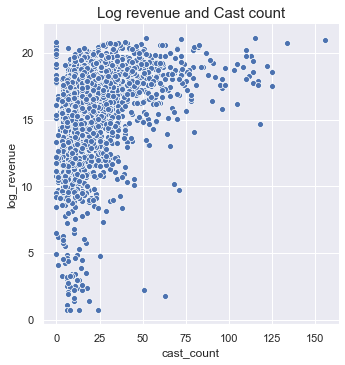

In [41]:
sns.relplot(x="cast_count", y="log_revenue", data=movie);
plt.title('Log revenue and Cast count', fontsize=15)
plt.show()

In [42]:
#Adding cast count for  test data

test_total_cast=[]
for r in test['cast']:
    if(pd.isnull(r)==False):        
        test_total_cast.append(len(eval(r)))    
    else:
        test_total_cast.append(0)
test['cast_count'] = test_total_cast

In [43]:
#Dropping cast
movie= movie.drop(['cast'],axis=1)
test= test.drop(['cast'],axis=1)

### crew

In [ ]:
#inspect crew
for r,v in enumerate(movie['crew'][:1]):
    print(r,v)

In [45]:
#Adding crew count for movie data

count_crew=[]
for r in movie['crew']:
    if (pd.isnull(r)==False):
       count_crew.append(len(eval(r)))
    else:
        count_crew.append(0)
        
movie['count_crew'] = count_crew

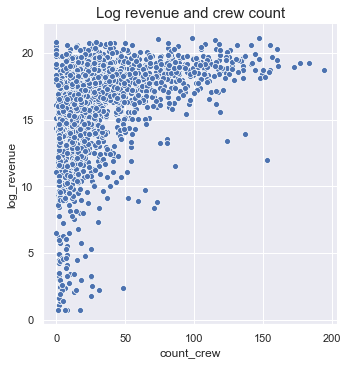

In [46]:
sns.relplot(x="count_crew", y="log_revenue", data=movie);
plt.title('Log revenue and crew count', fontsize=15);

In [47]:
# Adding crew count for test data
test_count_crew=[]
for r in test['crew']:
    if (pd.isnull(r)==False):
       test_count_crew.append(len(eval(r)))
    else:
        test_count_crew.append(0)
        
test['count_crew'] = test_count_crew

In [48]:
#Drop original crew
movie= movie.drop(['crew'],axis=1)
test= test.drop(['crew'],axis=1)

### status

In [49]:
#inspect status

print(f'movie data "status" column value counts: \n{movie.status.value_counts()}\n')

print(f'test data "status" column value counts: \n{test.status.value_counts()}\n')


movie data "status" column value counts: 
Released    2996
Rumored        4
Name: status, dtype: int64

test data "status" column value counts: 
Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64



In [50]:
# Drop status column beacsue values are different in movie and test dataset 

movie.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

### Keywords

In [51]:
for r,v in enumerate(movie['Keywords'][:5]):
    print(r,v)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [52]:
#Add keywords count to movie data

count_keywords=[]
for r in movie['Keywords']:
    if(pd.isnull(r)==False):
        
        count_keywords.append(len(eval(r)))
        
    else:
        count_keywords.append(0)
movie['count_keywords'] = count_keywords

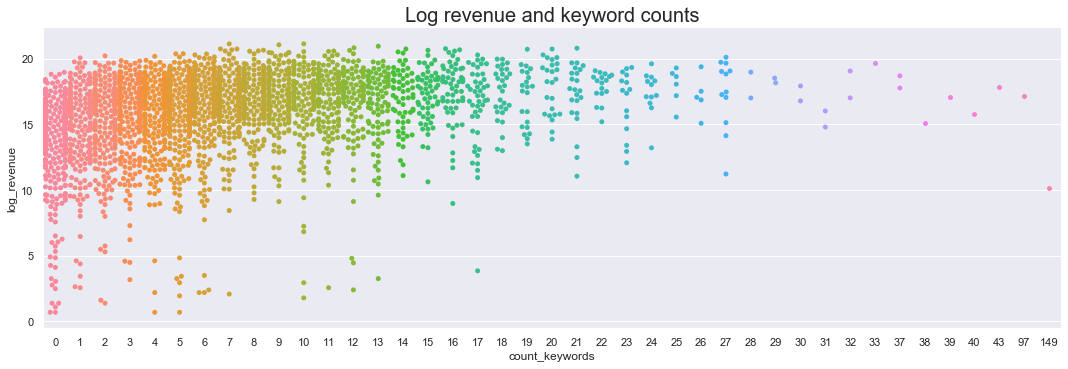

In [53]:
#number of key word counts vs revenue

sns.catplot(x='count_keywords', y='log_revenue', data=movie, height = 5, aspect = 3, kind='swarm');
plt.title('Log revenue and keyword counts', fontsize = 20);

In [54]:
#Add keywords count to test data

test_count_keywords=[]
for r in test['Keywords']:
    if(pd.isnull(r)==False):
        
        test_count_keywords.append(len(eval(r)))
        
    else:
        test_count_keywords.append(0)
test['count_keywords'] = test_count_keywords

In [55]:
#Drop original keywords

movie = movie.drop(['Keywords'], axis=1)
test = test.drop(['Keywords'], axis=1)

### tagline

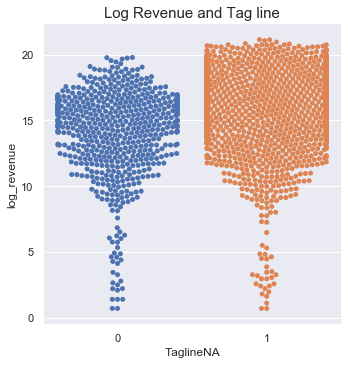

In [56]:
#Transform tagline to with (1) or without(0) tagline

movie['TaglineNA'] = 0
movie.loc[movie['tagline'].isnull() == False, 'TaglineNA'] = 1
test['TaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'TaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='TaglineNA', y='log_revenue', data=movie, kind='swarm');
plt.title('Log Revenue and Tag line', fontsize=15);

In [57]:
#Drop original tagline column

movie.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

### spoken language 

In [58]:
for r,v in enumerate(movie['spoken_languages'][:3]):
    print(r,v)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]


In [59]:
#Adding count spoke_langs for movie data 

langs_count=[]

for r in movie['spoken_languages']:
    if (pd.isnull(r)==False):
        langs_count.append(len(eval(r)))
    else:
        langs_count.append(0)
        
movie['count_langs'] = langs_count

In [60]:
#Adding count spoke_langs for test data 

test_langs_count=[]
for r in test['spoken_languages']:
    if(pd.isnull(r)==False):
        test_langs_count.append(len(eval(r)))
    else:
        test_langs_count.append(0)
        
test['count_langs'] = test_langs_count

In [61]:
#Drop spoken_languages
movie.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

### runtime

In [62]:
#runtime has 2 & 4 occurences of missing value respectively , fill in the missing value swith column mean

movie['runtime'].fillna(value =movie['runtime'].mean(), inplace=True)
test['runtime'].fillna(value = test['runtime'].mean(),inplace=True)

### Drop columns so the dataset is ready for training

In [63]:
movie.drop(['release_month', 'release_year', 'release_day', 'AvgRevenueByYear', 'log_revenue'], axis=1, inplace=True)
testid = test.id
test.drop(['id'], axis=1, inplace=True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   budget              3000 non-null   int64  
 2   overview            3000 non-null   int64  
 3   popularity          3000 non-null   float64
 4   runtime             3000 non-null   float64
 5   revenue             3000 non-null   int64  
 6   has_collection      3000 non-null   int64  
 7   has_homepage        3000 non-null   int64  
 8   num_genres          3000 non-null   int64  
 9   num_prod_companies  3000 non-null   int64  
 10  num_prod_countries  3000 non-null   int64  
 11  cast_count          3000 non-null   int64  
 12  count_crew          3000 non-null   int64  
 13  count_keywords      3000 non-null   int64  
 14  TaglineNA           3000 non-null   int64  
 15  count_langs         3000 non-null   int64  
dtypes: flo

### Baseline Mode 

In [64]:
#creating a baseline model, using just average, manually computing MSE
movie2= movie
target_mean = movie2['revenue'].mean()
movie2["revenue_pred"]= target_mean
movie2["revenue_dif"]=movie2["revenue"]-movie2["revenue_pred"]
movie2["revenue_dif_squared"]=movie2["revenue_dif"]**2
movie2["revenue_dif_squared_avg"]=movie2["revenue_dif_squared"] / len(movie2["revenue_pred"])
movie2["revenue_RMSE"] = np.sqrt(movie2["revenue_dif_squared_avg"])

print("The RMSE of the model using just means is:", movie2["revenue_RMSE"][0])


The RMSE of the model using just means is: 993408.0702555958


###### Baseline model with simple mean did a poor job with RMSE score. I need to come up with models that will improve the MSE. My models of choice are:

    Linear Regression:  our log revenue follows a relatively linear shape
    
    Decision Trees: DT is a basic and fast approach for modeling, and performs well with linear relationships
        
    Gradient Boosting: as a regression problem, gradient boosting offers great way for weak learners to improve their performance, and is often used to minimize the RMSE
    
    Neural Network : a shallow NN to see if the RMSE is better in any way

## Develop - Model Building

In [65]:
movie.head()

,id,budget,overview,popularity,runtime,revenue,has_collection,has_homepage,num_genres,num_prod_companies,...,cast_count,count_crew,count_keywords,TaglineNA,count_langs,revenue_pred,revenue_dif,revenue_dif_squared,revenue_dif_squared_avg,revenue_RMSE
0,1,14000000,1,6.575393,93.0,12314651,1,0,1,3,...,24,72,4,1,1,6.672585e+07,-5.441120e+07,2.960579e+15,9.868596e+11,9.934081e+05
1,2,40000000,1,8.248895,113.0,95149435,1,0,4,1,...,20,9,4,1,1,6.672585e+07,2.842358e+07,8.079001e+14,2.693000e+11,5.189413e+05
2,3,3300000,1,64.299990,105.0,13092000,0,1,1,3,...,51,64,12,1,1,6.672585e+07,-5.363385e+07,2.876590e+15,9.588634e+11,9.792157e+05
3,4,1200000,1,3.174936,122.0,16000000,0,1,2,0,...,7,3,7,0,2,6.672585e+07,-5.072585e+07,2.573112e+15,8.577040e+11,9.261231e+05
4,5,0,1,1.148070,118.0,3923970,0,0,2,0,...,4,2,0,0,1,6.672585e+07,-6.280188e+07,3.944076e+15,1.314692e+12,1.146600e+06


In [66]:
movie['budget'] = np.log1p(movie['budget'])

In [67]:
cols = [col for col in movie.columns if col not in ['revenue', 'id', 'revenue', 'revenue_pred', 'revenue_dif', 'revenue_dif_squared','revenue_RMSE', 'revenue_dif_squared_avg']]

X=movie[cols].values
y= movie['revenue'].values
y=np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

### M1: Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

clf = LinearRegression()
clf.fit(X,y)

scores = cross_val_score(clf, X, y, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-scores)

print(f'The Root Mean Square Error for Linear Model is: {lr_rmse_scores.mean()}')

The Root Mean Square Error for Linear Model is: 2.4274016671284366


In [69]:
#saving the lr boosting model
import joblib
joblib_file = "LM_revenue_model.pkl"
joblib.dump(clf, joblib_file)

#loading the saved model
model = joblib.load("LM_revenue_model.pkl")
print("The model used is:", model)

The model used is: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


### M2: Decision Tree

In [70]:
from sklearn import tree

tree = tree.DecisionTreeRegressor()
tree.fit(X,y)

scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print(f'The Root Mean Square Error for Random Forest Model is: {tree_rmse_scores.mean()}')

The Root Mean Square Error for Random Forest Model is: 3.216855696241552


### M3: Gradient Boosting - combines results along the way

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=150, max_depth=5)
gb.fit(X,y)

gb_scores = cross_val_score(gb,movie,y,scoring="neg_mean_squared_error", cv=10)
gb_rmse_scores = np.sqrt(-gb_scores)

print(f"The Root Mean Square Error for Gradient Boosting Model is: {gb_rmse_scores.mean()}")

The Root Mean Square Error for Gradient Boosting Model is: 0.013340055022666043


#### Best Model is Gradient Boosting 

In [72]:
#saving the gd boosting model
import joblib
joblib_file = "GB_revenue_model.pkl"
joblib.dump(gb, joblib_file)

#loading the saved model
model = joblib.load("GB_revenue_model.pkl")
print("The model used is:", model)

The model used is: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [73]:
#scoring the test dataset
revenue_predictions = model.predict(test)

#saving the predictions
pd.DataFrame({'id': testid, 'revenue': revenue_predictions}).to_csv('gbsubmission.csv', index=False)

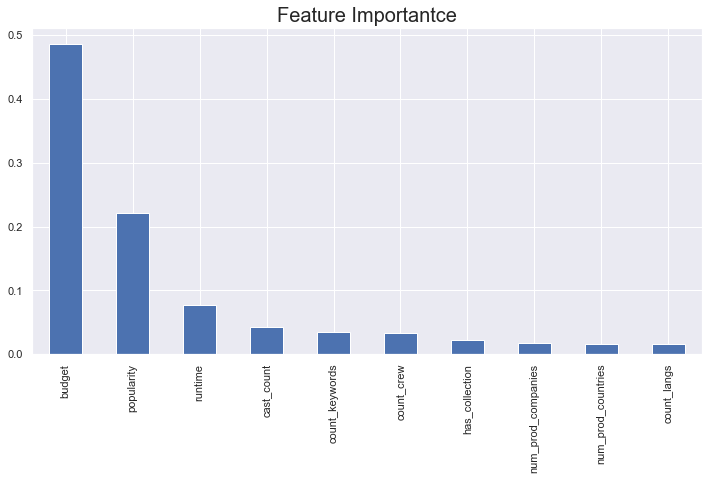

In [74]:
#showing feature importances
movie.drop(['revenue', 'id', 'revenue', 'revenue_pred', 'revenue_dif', 'revenue_dif_squared','revenue_RMSE', 'revenue_dif_squared_avg'], axis=1, inplace=True)
importances = pd.Series(model.feature_importances_, index=movie.columns)
importances.nlargest(10).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importantce', fontsize=20)
plt.show()

#saving feature importances
np.savetxt('revenue_importances.csv', importances, delimiter=',')

### M4: Neural Net

In [75]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


In [76]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train, y_train,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

600/600 [==============================] - 0s 30us/step


In [77]:
nnrmse = np.sqrt(test_mse_score)

print(f'The Root Mean Square Error for Neural Network Model is: {nnrmse}')

The Root Mean Square Error for Neural Network Model is: 2.287517968612722


###### 2 layers Nerual Network performs better than LR and Decision tree but no better than Gradient Boosting

## SUMMARY


######  I have developed a model that predicts movie revenue based on different features. After performing the exploratory data analysis, I developed a baseline model, fitted three models, and outputed their root mean squared errors for comparsion against one another.    The best performing model is the gradient boosting model. I saved the best model, and predicted the revenue of test data with it. The results of the prediction and feature importance are all saved in  csv file.